<left><img src="https://i.ibb.co/zWjkHsWJ/marca-final-rgb-campanha-2025-versao02.png" width="35%" height="35%"></left>


# Tópicos em Matemática Aplicada: Deep Learning (Aula 04)

**Exemplo 02**

Data: 11/set/25


---

# Introdução ao Keras/PyTorch: MNIST e CIFAR-10

Nesta aula, vamos aprender a usar a API Keras, famosa por sua simplicidade, mas com todo o poder do PyTorch como motor.

**Objetivo:** resolver o mesmo problema de classificação de um dígito manuscrito e da classificação de objetos no conjunto CIFAR-10, porém usando o Keras.

Mas, o que é o Keras? Segundo sua própria definição é:

"A `tf.keras` é uma API de alto nível para o TensorFlow, Pytorch e Jax para criar e treinar modelos de aprendizado profundo. Ela é usada para prototipagem rápida, pesquisa de ponta e produção, com três principais vantagens:

* Fácil de usar:
A Keras tem uma interface simples e consistente otimizada para os casos de uso comuns. Ela fornece feedback claro e prático para os erros do usuário.
* Os modelos modulares e compostos:
da Keras são feitos conectando elementos configuráveis, com poucas restrições.
* Fácil de estender:
Desenvolva elementos personalizados que expressem novas ideias para pesquisa. Crie novas camadas, métricas e funções de perda e desenvolva modelos de última geração."

No site do Keras é possível encontrar vários exemplos de problemas resolvidos: https://keras.io/examples/.

**Objetivos da Aula:**
1.  Configurar o Keras para usar o PyTorch como seu motor computacional.
2.  **Exemplo 1 (MNIST):** Construir e treinar uma Rede Neural simples para classificar os dígitos manuscritos que fizemos na aula anterior.
3.  **Exemplo 2 (CIFAR-10):** Aplicar a mesma arquitetura a um problema mais difícil de classificação com imagens coloridas do conjunto CIFAR-10.

---

**Passo Inicial:** Para que tudo funcione, precisamos dizer ao Keras para usar o PyTorch *antes* de importarmos a biblioteca `keras`. Faremos isso na próxima célula.

In [ ]:
# Definir o backend ANTES de qualquer importação do Keras
import os
os.environ["KERAS_BACKEND"] = "torch"

---

Pronto, agora podemos importar o restante das coisas

In [ ]:
# Agora podemos importar tudo
import keras
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Checa a versão do keras e verifica se está de fato usando o Pytorch
print(f"Versão do Keras: {keras.__version__}")
print(f"Keras está usando o backend: {keras.backend.backend()}")
# Verifica se a GPU está disponível e define o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

Versão do Keras: 3.10.0
Keras está usando o backend: torch
Usando o dispositivo: cuda


---
## Exemplo 1: MNIST

Vamos começar com o nosso "Olá, Mundo!" do Deep Learning: o dataset MNIST que vimos nos exemplos anteriores.

O Keras, assim como o Pytorch, já possui esse dataset na sua base de dados. Podemos carregá-lo diretamente com o usando o método `keras.datasets.mnist.load_data()`. Importante dizer que ele já traz o dataset separado entre treino e teste.

In [ ]:
# O Keras já vem com datasets famosos pré-carregados
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train_mnist = x_train_mnist.astype("float32") / 255.0
x_test_mnist = x_test_mnist.astype("float32") / 255.0

print("Formato dos dados de treino (imagens):", x_train_mnist.shape)
print("Formato dos dados de treino (rótulos):", y_train_mnist.shape)
print(f"Temos {x_train_mnist.shape[0]} imagens de treino e {x_test_mnist.shape[0]} de teste.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape dos dados de treino (imagens): (60000, 28, 28)
Shape dos dados de treino (rótulos): (60000,)
Temos 60000 imagens de treino e 10000 de teste.


É sempre importante visualizar os dados com os quais estamos trabalhando. Vamos ver algumas imagens do MNIST e seus rótulos correspondentes.

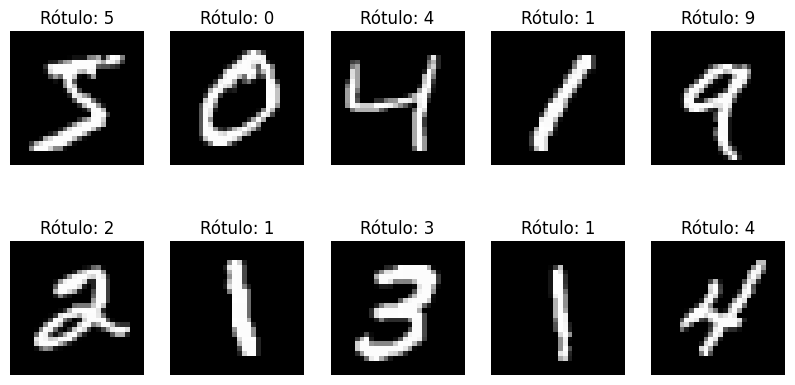

In [ ]:
# Nomes das classes para MNIST (de 0 a 9)
class_names_mnist = [str(i) for i in range(10)]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_mnist[i], cmap='gray')
    plt.title(f"Rótulo: {class_names_mnist[y_train_mnist[i]]}")
    plt.axis('off')
plt.show()

----

Vamos construir nosso modelo usando `keras.Sequential`. A arquitetura será:
1.  `Flatten`: Transforma cada imagem 28x28 em um vetor de 784 pixels.
2.  `Dense`: Uma camada de neurônios totalmente conectada.
3.  `Dense` (Saída): Uma camada final com 10 neurônios (um para cada classe) e ativação `softmax` para nos dar as probabilidades. *Note que aqui há uma ligeira diferença com a forma de se implementar no Pytorch.*

Depois, usaremos `model.compile()` para configurar o treinamento e `model.fit()` para executá-lo.

In [ ]:
# Construir o modelo
model_mnist = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compilar o modelo
model_mnist.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Imprime um resumo da rede que estamos criando
model_mnist.summary()

# Treinar o modelo
print("\nIniciando treinamento do modelo para MNIST...")
history_mnist = model_mnist.fit(
    x_train_mnist,
    y_train_mnist,
    batch_size=128,
    epochs=5,
    validation_split=0.1 # Usar 10% dos dados de treino para validação
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando treinamento do modelo para MNIST...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8176 - loss: 0.6576 - val_accuracy: 0.9555 - val_loss: 0.1670
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9485 - loss: 0.1818 - val_accuracy: 0.9675 - val_loss: 0.1188
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9629 - loss: 0.1300 - val_accuracy: 0.9695 - val_loss: 0.1033
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9713 - loss: 0.1017 - val_accuracy: 0.9765 - val_loss: 0.0882
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9769 - loss: 0.0794 - val_accuracy: 0.9773 - val_loss: 0.0846


---

Verifica as métricas de qualidade do modelo

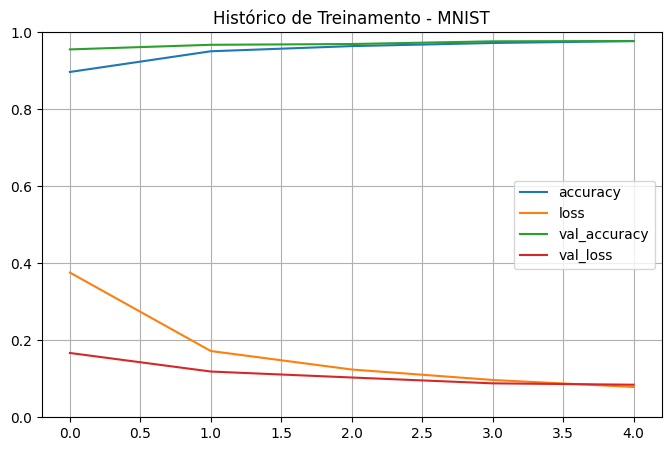


Acurácia no conjunto de teste do MNIST: 97.28%


In [ ]:
# Plotar o histórico de treinamento
pd.DataFrame(history_mnist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Histórico de Treinamento - MNIST")
plt.gca().set_ylim(0, 1) # Ajustar o eixo Y para melhor visualização
plt.show()

# Avaliar no conjunto de teste
loss, accuracy = model_mnist.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f"\nAcurácia no conjunto de teste do MNIST: {accuracy * 100:.2f}%")

### Matriz de Confusão para o MNIST

Vamos agora checar a **Matriz de Confusão** e ver que temos uma diagonal muito forte, indicando que o nosso modelo raramente confunde os dígitos.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


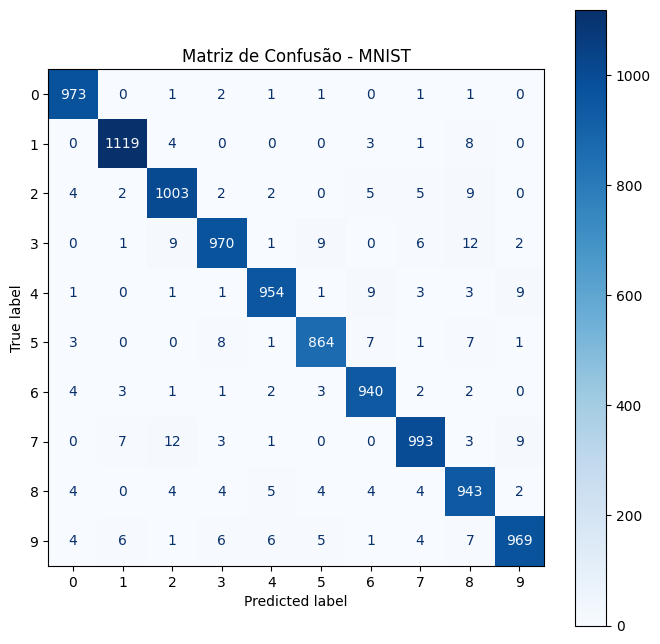

In [ ]:
# Fazer predições no conjunto de teste para obter as classes
y_pred_probs_mnist = model_mnist.predict(x_test_mnist)
y_pred_mnist = np.argmax(y_pred_probs_mnist, axis=1)

# Calcular e exibir a matriz de confusão
cm_mnist = confusion_matrix(y_test_mnist, y_pred_mnist)
disp_mnist = ConfusionMatrixDisplay(confusion_matrix=cm_mnist, display_labels=class_names_mnist)

fig, ax = plt.subplots(figsize=(8, 8))
disp_mnist.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - MNIST")
plt.show()

---
## Exemplo 2: CIFAR-10

Tivemos como resultado esperado no MNIST aproximadamente 98% de acurácia, o que é um sucesso!

Agora, vamos enfrentar um problema um pouco mais difícil: o dataset CIFAR-10. Ele consiste em imagens coloridas de 32x32 pixels, divididas em 10 classes como 'avião', 'carro', 'pássaro', 'gato', etc.

**O Experimento:** Vamos usar exatamente a mesma lógica e estrutura do modelo anterior. A única mudança será adaptar o tamanho da camada de entrada para as novas imagens. A pergunta é: será que a nossa rede conseguirá aprender a diferenciar um gato de um cachorro apenas olhando para os pixels de forma isolada?

---

O CIFAR-10 também é um dataset pré-carregado no Keras. Chamamos ele com `keras.datasets.cifar10.load_data()`.

In [1]:
# Carregar o dataset CIFAR-10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Normalizar os valores dos pixels
x_train_cifar = x_train_cifar.astype("float32") / 255.0
x_test_cifar = x_test_cifar.astype("float32") / 255.0

# Os rótulos vêm como arrays 2D, vamos achatá-los para 1D
y_train_cifar = y_train_cifar.flatten()
y_test_cifar = y_test_cifar.flatten()

print("Formato dos dados de treino (imagens):", x_train_cifar.shape)
print("Formato dos dados de treino (rótulos):", y_train_cifar.shape)

NameError: name 'keras' is not defined

---

Aqui também temos 10 classes, porém são classes de objetos completamente distintos como: carros, pássaros e gatos.

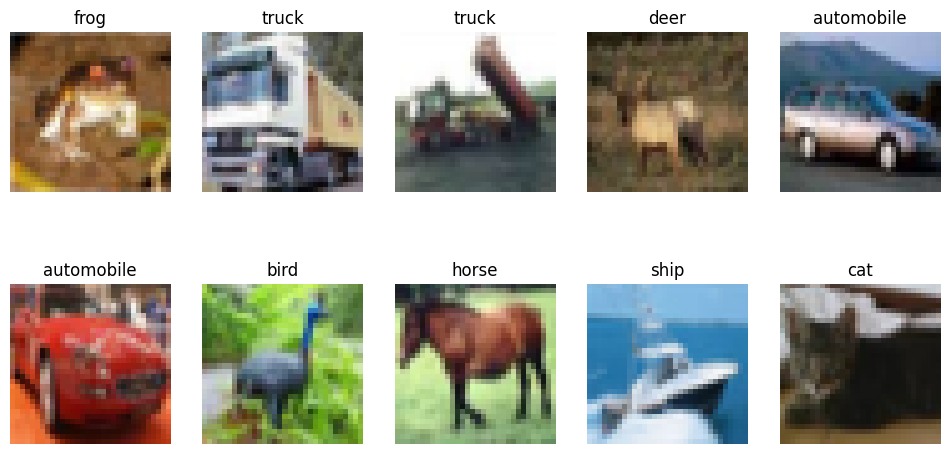

In [ ]:
# Nomes das classes para CIFAR-10
class_names_cifar = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train_cifar[i])
    plt.title(class_names_cifar[y_train_cifar[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Construir o modelo para CIFAR-10
model_cifar = keras.Sequential([
    # A única mudança é o shape da entrada: 32x32 com 3 canais de cor
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compilar o modelo (com mesma a configuração anterior)
model_cifar.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_cifar.summary()

# Treinar o modelo
print("\nIniciando treinamento do modelo para CIFAR-10...")
history_cifar = model_cifar.fit(
    x_train_cifar,
    y_train_cifar,
    batch_size=128,
    epochs=50, # Vamos treinar por mais épocas para dar uma chance ao modelo
    validation_split=0.1
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)


Iniciando treinamento do modelo para CIFAR-10...
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2605 - loss: 2.0255 - val_accuracy: 0.3556 - val_loss: 1.7876
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3880 - loss: 1.7160 - val_accuracy: 0.4004 - val_loss: 1.6848
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4196 - loss: 1.6355 - val_accuracy: 0.4262 - val_loss: 1.6184
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4406 - loss: 1.5807 - val_accuracy: 0.4240 - val_loss: 1.6182
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4531 - loss: 1.5336 - val_accuracy: 0.4384 - val_loss: 1.5876
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4643 - loss: 1.5006 - val_accuracy: 0.4560 - val_loss: 1.5481
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4703 - loss: 1.4770 - val_accuracy: 0.4472 - val_loss: 1.5603
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - 

---

Vamos agora as métricas de qualidade

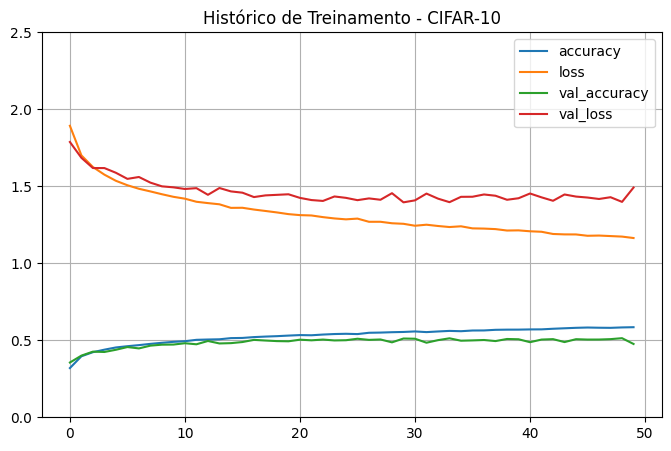


Acurácia no conjunto de teste do CIFAR-10: 47.81%


In [ ]:
# Plotar o histórico de treinamento
pd.DataFrame(history_cifar.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Histórico de Treinamento - CIFAR-10")
plt.gca().set_ylim(0, 2.5)
plt.show()

# Avaliar no conjunto de teste
loss, accuracy = model_cifar.evaluate(x_test_cifar, y_test_cifar, verbose=0)
print(f"\nAcurácia no conjunto de teste do CIFAR-10: {accuracy * 100:.2f}%")

### Matriz de Confusão para o CIFAR-10

Agora, vamos gerar a matriz para o CIFAR-10. Diferente da matriz limpa do MNIST, aqui esperamos ver um resultado muito mais caótico.

Isso se manifestará como:
-   **Diagonal mais fraca:** Os números na diagonal principal serão menores, indicando menos acertos para cada classe.
-   **Valores altos fora da diagonal:** Veremos muitos erros, com o modelo confundindo classes visualmente similares.

Observe quais classes são mais confundidas entre si. É comum que a rede confunda 'gato' com 'cachorro' ou 'caminhão' com 'automóvel', pois, como vimos, ela não consegue capturar as características visuais sutis que os diferenciam.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


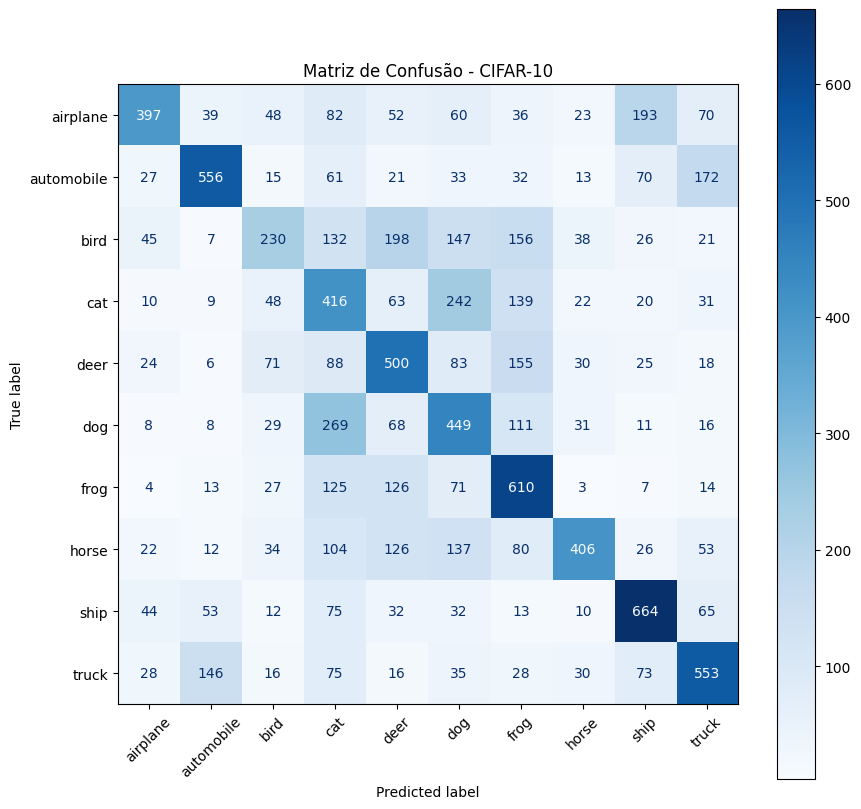

In [ ]:
# Fazer predições no conjunto de teste para obter as classes
y_pred_probs_cifar = model_cifar.predict(x_test_cifar)
y_pred_cifar = np.argmax(y_pred_probs_cifar, axis=1)

# Calcular e exibir a matriz de confusão
cm_cifar = confusion_matrix(y_test_cifar, y_pred_cifar)
disp_cifar = ConfusionMatrixDisplay(confusion_matrix=cm_cifar, display_labels=class_names_cifar)

# Usamos um tamanho de figura maior e rotação nos rótulos para melhor visualização
fig, ax = plt.subplots(figsize=(10, 10))
disp_cifar.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - CIFAR-10")
plt.xticks(rotation=45)
plt.show()

## Análise Final: Por que a rede neural falhou no CIFAR-10?

Vamos comparar os resultados:
-   **Acurácia no MNIST:** Cerca de **98%**. Um resultado excelente.
-   **Acurácia no CIFAR-10:** Cerca de **48%**. Um resultado muito ruim, pouco melhor que um chute aleatório (que seria em torno de 10%).

**Por que essa diferença brutal?**

A camada `Flatten` que usamos destrói toda a **informação espacial** da imagem. Para a MLP, a imagem é apenas uma longa lista de pixels sem relação uns com os outros.

1.  **No MNIST**, isso funciona razoavelmente bem. Um "7" sempre terá pixels ativos no topo e em uma diagonal, não importa se um pixel está "ao lado" do outro. A posição geral é o que importa.

2.  **No CIFAR-10**, isso é um desastre. Para saber se uma imagem contém um 'gato', o modelo precisa identificar características locais como 'olhos', 'orelhas' e 'bigodes'. Essas características são definidas pela relação espacial entre pixels vizinhos (um grupo de pixels forma uma textura de pelo, outro grupo forma o contorno de uma orelha).

A rede neural é "cega" a essas estruturas locais. Ela não consegue aprender o conceito de "orelha de gato".

**Próximo Passo:**
Para resolver isso, precisamos de um tipo de camada que preserve e aprenda com a estrutura espacial da imagem. Precisamos de camadas que funcionem como detectores de características da imagem.

Essas características são extraídas utilizando convoluções, que ocorrem nas camadas convolucionais. Elas são a base das **Redes Neurais Convolucionais (CNNs)**, o assunto da nossa próxima aula!